In [2]:
import dicom
import pylab

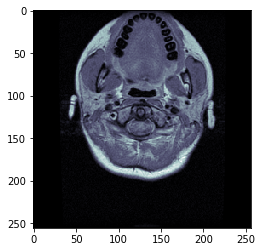

In [3]:
# display a sample dicom image
ds = dicom.read_file("images/brain_001.dcm")
pylab.imshow(ds.pixel_array, cmap=pylab.cm.bone)
pylab.show()

In [4]:
# convert dicom image data to binary data
import array
hex_vals = ds.PixelData
byte_array = array.array('B',hex_vals)
print byte_array[:105]

array('B', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 6, 0, 1, 0, 9, 0, 7, 0, 8, 0, 5, 0, 3, 0, 3, 0, 5, 0, 3, 0, 7, 0, 8, 0, 1, 0, 8, 0, 8, 0, 6, 0, 7, 0, 5, 0, 5, 0, 7, 0, 3])


In [5]:
#print byte_array.decode("utf-8")
byte_array = "".join(map(chr,byte_array))

In [6]:
type(byte_array)

str

In [7]:
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
backend = default_backend()
key = os.urandom(32)
iv = os.urandom(16)
cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=backend)
encryptor = cipher.encryptor()


In [8]:
ct = encryptor.update(byte_array) + encryptor.finalize()

In [9]:
print type(ct)

<type 'str'>


In [10]:
decryptor = cipher.decryptor()
new_byte_array = decryptor.update(ct) + decryptor.finalize()

In [11]:
if byte_array == new_byte_array:
    print True

True


In [12]:
from pyblake2 import blake2b
h = blake2b()

In [13]:
h.update(ct)
auth_code = h.hexdigest()
# the hash output size -128
print 'length of hash: ',len(auth_code)
print auth_code
print type(auth_code)

length of hash:  128
53aed8bd3efcd8e6b6e04ebf624de39c64363dfaad238569b36f0c7c31b953a7722e5bda4fe6d1f37afd08f813f706a579ca295413690f57d55a9914c60c71b1
<type 'str'>


In [14]:
h.update(ct)
h.hexdigest()

'ad0bc47cf17847f1bef444b1b0e252a0aa27b8a4868d754b9fb5eb96ea934483d49b378a19ca22fcc4d0cd13d1a46d62c70842b60cdaa306bc127284dbc6d503'

In [15]:
# check that if image can be reformed after the binary 
# data of the image has been decrypted
ds.PixelData = new_byte_array

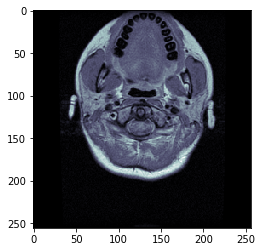

In [16]:
pylab.imshow(ds.pixel_array, cmap=pylab.cm.bone)
pylab.show()

In [17]:
print type(key)

<type 'str'>


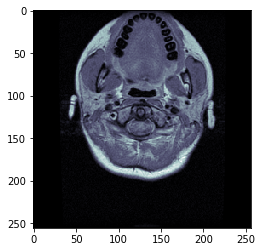

In [22]:
ds = dicom.read_file("new_file_final.dcm")
pylab.imshow(ds.pixel_array, cmap=pylab.cm.bone)
pylab.show()